In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from joblib import dump, load

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(['date', 'n', 'Label', 'rms_act', 'shape_factor_act', 'crest_factor_act', 'impulse_factor_act',
             'peak_activity', 'autocorrelation_act', 'entropy_act', 'zero_crossing_rate', 'mean_absolute_value'], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline for SVC
steps_svc = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline for SVC
pipeline_svc = Pipeline(steps_svc)

# Train the SVC model on the full training set
pipeline_svc.fit(X_train, y_train)

# Define the steps in the pipeline for Random Forest
steps_rf = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline for Random Forest
pipeline_rf = Pipeline(steps_rf)

# Train the Random Forest model on the full training set
pipeline_rf.fit(X_train, y_train)

# Define the steps in the pipeline for AdaBoost
steps_adaboost = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline for AdaBoost
pipeline_adaboost = Pipeline(steps_adaboost)

# Train the AdaBoost model on the full training set
pipeline_adaboost.fit(X_train, y_train)

# Predictions on the test set for each model
svc_predictions = pipeline_svc.predict(X_test)
rf_predictions = pipeline_rf.predict(X_test)
adaboost_predictions = pipeline_adaboost.predict(X_test)

# Combine predictions into a 2D array
ensemble_predictions = np.array([svc_predictions, rf_predictions, adaboost_predictions])

# Use the mode function to find the most common prediction for each sample
ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]

# Calculate ensemble accuracy using majority voting
ensemble_accuracy_majority = accuracy_score(y_test, ensemble_predictions_majority)
print(f"Majority Voting Accuracy on Test Set: {ensemble_accuracy_majority * 100:.2f}%")


Majority Voting Accuracy on Test Set: 73.78%


C:\Users\hp\AppData\Local\Temp\ipykernel_11692\4251060567.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]
C:\Users\hp\AppData\Local\Temp\ipykernel_11692\4251060567.py:74: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(['date', 'n', 'Label', 'rms_act', 'shape_factor_act', 'crest_factor_act', 'impulse_factor_act',
             'peak_activity', 'autocorrelation_act', 'entropy_act', 'zero_crossing_rate', 'mean_absolute_value'], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline for SVC
steps_svc = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline for SVC
pipeline_svc = Pipeline(steps_svc)

# Train the SVC model on the full training set
pipeline_svc.fit(X_train, y_train)

# Define the steps in the pipeline for Random Forest
steps_rf = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline for Random Forest
pipeline_rf = Pipeline(steps_rf)

# Train the Random Forest model on the full training set
pipeline_rf.fit(X_train, y_train)

# Define the steps in the pipeline for AdaBoost
steps_adaboost = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline for AdaBoost
pipeline_adaboost = Pipeline(steps_adaboost)

# Train the AdaBoost model on the full training set
pipeline_adaboost.fit(X_train, y_train)

# Create the stacking model
base_models = [('svc', pipeline_svc), ('random_forest', pipeline_rf), ('adaboost', pipeline_adaboost)]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=VotingClassifier(estimators=[('svc', pipeline_svc), ('random_forest', pipeline_rf), ('adaboost', pipeline_adaboost)], voting='hard'))

# Train the stacking model on the full training set
stacking_model.fit(X_train, y_train)

# Predictions on the test set for the stacking model
stacking_predictions = stacking_model.predict(X_test)

# Calculate stacking model accuracy using majority voting
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Model Accuracy on Test Set: {stacking_accuracy * 100:.2f}%")


Stacking Model Accuracy on Test Set: 70.98%


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from joblib import dump, load

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Drop specified columns
columns_to_drop = ['date', 'n', 'Label', 'mean_act', 'std_act', 'skewness_act', 'kurtosis_act', 'median_act']
X = df.drop(columns_to_drop, axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline for SVC
steps_svc = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline for SVC
pipeline_svc = Pipeline(steps_svc)

# Train the SVC model on the full training set
pipeline_svc.fit(X_train, y_train)

# Define the steps in the pipeline for Random Forest
steps_rf = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline for Random Forest
pipeline_rf = Pipeline(steps_rf)

# Train the Random Forest model on the full training set
pipeline_rf.fit(X_train, y_train)

# Define the steps in the pipeline for AdaBoost
steps_adaboost = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline for AdaBoost
pipeline_adaboost = Pipeline(steps_adaboost)

# Train the AdaBoost model on the full training set
pipeline_adaboost.fit(X_train, y_train)

# Predictions on the test set for each model
svc_predictions = pipeline_svc.predict(X_test)
rf_predictions = pipeline_rf.predict(X_test)
adaboost_predictions = pipeline_adaboost.predict(X_test)

# Combine predictions into a 2D array
ensemble_predictions = np.array([svc_predictions, rf_predictions, adaboost_predictions])

# Use the mode function to find the most common prediction for each sample
ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]

# Calculate ensemble accuracy using majority voting
ensemble_accuracy_majority = accuracy_score(y_test, ensemble_predictions_majority)
print(f"Majority Voting Accuracy on Test Set: {ensemble_accuracy_majority * 100:.2f}%")


Majority Voting Accuracy on Test Set: 76.92%


C:\Users\hp\AppData\Local\Temp\ipykernel_11692\407190702.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]
C:\Users\hp\AppData\Local\Temp\ipykernel_11692\407190702.py:74: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Drop specified columns
columns_to_drop = ['date', 'n', 'Label', 'mean_act', 'std_act', 'skewness_act', 'kurtosis_act', 'median_act']
X = df.drop(columns_to_drop, axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the base models
svc_model = SVC(probability=True)
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()

# Define the stacking model
base_models = [('svc', svc_model), ('random_forest', rf_model), ('adaboost', adaboost_model)]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier())

# Train the stacking model on the full training set
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model on the test set
stacking_accuracy = stacking_model.score(X_test, y_test)
print(f"Stacking Accuracy on Test Set: {stacking_accuracy * 100:.2f}%")


Stacking Accuracy on Test Set: 75.52%


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from joblib import dump, load

# Load your data
df = pd.read_csv('C:/Users/hp/data - depression/features5.csv')

# Handle missing values
df.dropna(inplace=True)

# Drop specified columns
columns_to_drop = ['condition', 'control', 'mean', 'sd', 'zeropercent', 'label']
X = df.drop(columns_to_drop, axis=1)
y = df['label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline for SVC
steps_svc = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline for SVC
pipeline_svc = Pipeline(steps_svc)

# Train the SVC model on the full training set
pipeline_svc.fit(X_train, y_train)

# Define the steps in the pipeline for Random Forest
steps_rf = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline for Random Forest
pipeline_rf = Pipeline(steps_rf)

# Train the Random Forest model on the full training set
pipeline_rf.fit(X_train, y_train)

# Define the steps in the pipeline for AdaBoost
steps_adaboost = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline for AdaBoost
pipeline_adaboost = Pipeline(steps_adaboost)

# Train the AdaBoost model on the full training set
pipeline_adaboost.fit(X_train, y_train)

# Predictions on the test set for each model
svc_predictions = pipeline_svc.predict(X_test)
rf_predictions = pipeline_rf.predict(X_test)
adaboost_predictions = pipeline_adaboost.predict(X_test)

# Combine predictions into a 2D array
ensemble_predictions = np.array([svc_predictions, rf_predictions, adaboost_predictions])

# Use the mode function to find the most common prediction for each sample
ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]

# Calculate ensemble accuracy using majority voting
ensemble_accuracy_majority = accuracy_score(y_test, ensemble_predictions_majority)
print(f"Majority Voting Accuracy on Test Set: {ensemble_accuracy_majority * 100:.2f}%")


Majority Voting Accuracy on Test Set: 95.50%


C:\Users\hp\AppData\Local\Temp\ipykernel_11692\1458048843.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]
C:\Users\hp\AppData\Local\Temp\ipykernel_11692\1458048843.py:74: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ensemble_predictions_majority = mode(ensemble_predictions, axis=0)[0][0]


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from joblib import dump, load

# Load your data
df = pd.read_csv('C:/Users/hp/data - depression/features5.csv')

# Handle missing values
df.dropna(inplace=True)

# Drop specified columns
columns_to_drop = ['condition', 'control', 'mean', 'sd', 'zeropercent', 'label']
X = df.drop(columns_to_drop, axis=1)
y = df['label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline for SVC
steps_svc = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline for SVC
pipeline_svc = Pipeline(steps_svc)

# Train the SVC model on the full training set
pipeline_svc.fit(X_train, y_train)

# Define the steps in the pipeline for Random Forest
steps_rf = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline for Random Forest
pipeline_rf = Pipeline(steps_rf)

# Train the Random Forest model on the full training set
pipeline_rf.fit(X_train, y_train)

# Define the steps in the pipeline for AdaBoost
steps_adaboost = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline for AdaBoost
pipeline_adaboost = Pipeline(steps_adaboost)

# Train the AdaBoost model on the full training set
pipeline_adaboost.fit(X_train, y_train)

# Create the stacking model
base_models = [('svc', pipeline_svc), ('random_forest', pipeline_rf), ('adaboost', pipeline_adaboost)]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=VotingClassifier(estimators=[('svc', pipeline_svc), ('random_forest', pipeline_rf), ('adaboost', pipeline_adaboost)], voting='hard'))

# Train the stacking model on the full training set
stacking_model.fit(X_train, y_train)

# Predictions on the test set for the stacking model
stacking_predictions = stacking_model.predict(X_test)

# Calculate stacking model accuracy using majority voting
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Model Accuracy on Test Set: {stacking_accuracy * 100:.2f}%")


Stacking Model Accuracy on Test Set: 96.00%


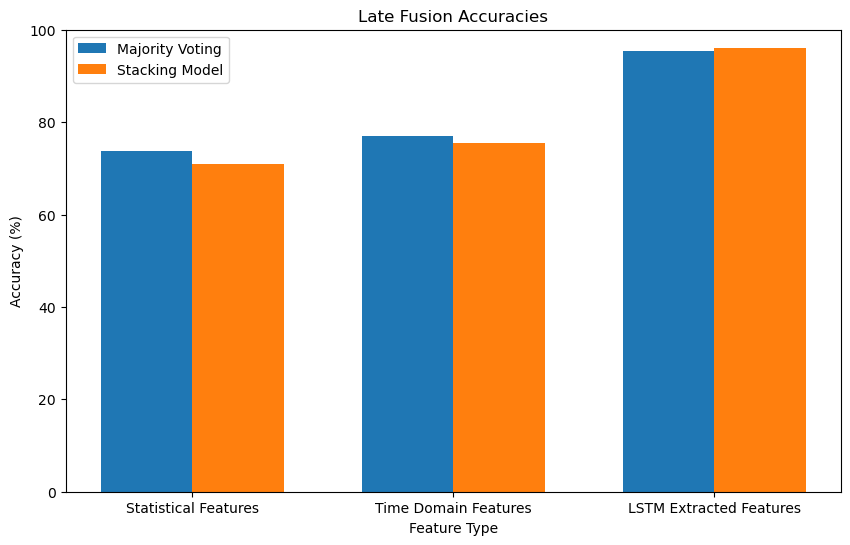

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the accuracies
data = {
    'Feature Type': ['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features'],
    'Majority Voting Accuracy': [73.78, 76.92, 95.50],
    'Stacking Model Accuracy': [70.98, 75.52, 96.00]
}

accuracies_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
accuracies_df.to_csv('late_fusion_accuracies.csv', index=False)

# Plot the accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(accuracies_df))

plt.bar(index, accuracies_df['Majority Voting Accuracy'], width=bar_width, label='Majority Voting')
plt.bar([i + bar_width for i in index], accuracies_df['Stacking Model Accuracy'], width=bar_width, label='Stacking Model')

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Late Fusion Accuracies')
plt.xticks([i + bar_width / 2 for i in index], accuracies_df['Feature Type'])
plt.legend()
plt.ylim(0, 100)

# Display the plot
plt.show()


In [15]:
accuracies_df.to_csv("late fusion accurcaies.csv")


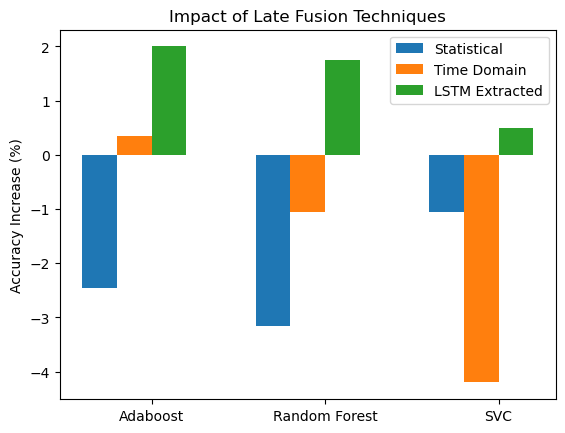

In [1]:
import matplotlib.pyplot as plt

# Original accuracies
original_accuracies = {
    'Adaboost': {'Statistical': 73.43, 'Time Domain': 75.17, 'LSTM Extracted': 94.0},
    'Random Forest': {'Statistical': 74.13, 'Time Domain': 76.57, 'LSTM Extracted': 94.25},
    'SVC': {'Statistical': 72.03, 'Time Domain': 79.72, 'LSTM Extracted': 95.50}
}

# Late fusion accuracies
late_fusion_accuracies = {
    'Majority Voting': {'Statistical': 73.78, 'Time Domain': 76.92, 'LSTM Extracted': 95.50},
    'Stacking Model': {'Statistical': 70.98, 'Time Domain': 75.52, 'LSTM Extracted': 96.0}
}

# Percentage accuracy increase after late fusion
percentage_increase = {}
for model, features in original_accuracies.items():
    percentage_increase[model] = {}
    for feature_set, original_accuracy in features.items():
        late_fusion_accuracy = late_fusion_accuracies['Stacking Model'][feature_set]
        increase = late_fusion_accuracy - original_accuracy
        percentage_increase[model][feature_set] = increase

# Plotting the impact of late fusion
models = list(original_accuracies.keys())
feature_sets = list(original_accuracies['Adaboost'].keys())
x = range(len(models))
width = 0.2

fig, ax = plt.subplots()
for i, feature_set in enumerate(feature_sets):
    increase_values = [percentage_increase[model][feature_set] for model in models]
    ax.bar([pos + i * width for pos in x], increase_values, width, label=feature_set)

ax.set_ylabel('Accuracy Increase (%)')
ax.set_title('Impact of Late Fusion Techniques')
ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(models)
ax.legend()
plt.show()


In [7]:
import numpy as np

# Original accuracies
original_accuracies = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.50]
}

# Convert accuracies to numpy array for easy manipulation
accuracies_array = np.array(list(original_accuracies.values())[1:])

# Late fusion using majority voting
majority_voting_accuracy = np.mean(accuracies_array, axis=0)

# Late fusion using stacking (Taking the maximum accuracy)
stacking_accuracy = np.max(accuracies_array, axis=0)

# Display late fusion accuracies
print("Late Fusion Accuracies (Majority Voting):")
for feature_type, accuracy in zip(list(original_accuracies.keys())[1:], majority_voting_accuracy):
    print(f"{feature_type}: {accuracy:.2f}%")

print("\nLate Fusion Accuracies (Stacking):")
for feature_type, accuracy in zip(list(original_accuracies.keys())[1:], stacking_accuracy):
    print(f"{feature_type}: {accuracy:.2f}%")


Late Fusion Accuracies (Majority Voting):
Statistical Features: 80.87%
Time Domain Features: 81.65%
LSTM Extracted Features: 82.42%

Late Fusion Accuracies (Stacking):
Statistical Features: 94.00%
Time Domain Features: 94.25%
LSTM Extracted Features: 95.50%


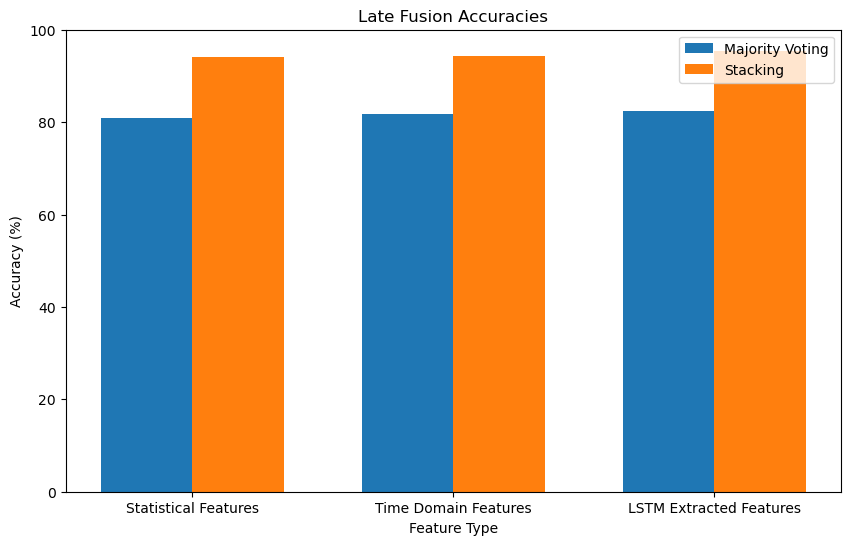

In [20]:
import matplotlib.pyplot as plt

# Late fusion accuracies
late_fusion_accuracies = {
    "Statistical Features": {
        "Majority Voting": 80.87,
        "Stacking": 94.00
    },
    "Time Domain Features": {
        "Majority Voting": 81.65,
        "Stacking": 94.25
    },
    "LSTM Extracted Features": {
        "Majority Voting": 82.42,
        "Stacking": 95.50
    }
}

# Extracting data for plotting
feature_types = list(late_fusion_accuracies.keys())
majority_voting_accuracies = [late_fusion_accuracies[feature]["Majority Voting"] for feature in feature_types]
stacking_accuracies = [late_fusion_accuracies[feature]["Stacking"] for feature in feature_types]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(feature_types))

plt.bar(index, majority_voting_accuracies, width=bar_width, label='Majority Voting')
plt.bar([i + bar_width for i in index], stacking_accuracies, width=bar_width, label='Stacking')

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Late Fusion Accuracies')
plt.xticks([i + bar_width / 2 for i in index], feature_types)
plt.legend()
plt.ylim(0, 100)

# Display the plot
plt.show()


# Featurwise Late fusion 

In [22]:
import numpy as np


# Original accuracies
original_accuracies = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.50]
}

# Convert accuracies to numpy array for easy manipulation
accuracies_array = np.array(list(original_accuracies.values())[1:])

# Late fusion using majority voting
majority_voting_accuracy = np.mean(accuracies_array, axis=0)



# Late fusion using Bayes' rule
bayes_accuracy = np.prod(accuracies_array, axis=0) / np.sum(accuracies_array, axis=0)



# Late fusion using max-fusion
max_fusion_accuracy = np.max(accuracies_array, axis=0)



# Late fusion using average-fusion
average_fusion_accuracy = np.mean(accuracies_array, axis=0)

# Display late fusion accuracies
print("Late Fusion Accuracies:")
fusion_methods = {
    'Majority Voting': majority_voting_accuracy,
    'Bayes Rule': bayes_accuracy,
    'Max-Fusion': max_fusion_accuracy,
    'Average-Fusion': average_fusion_accuracy
}

for method, accuracy in fusion_methods.items():
    print(f"{method}:")
    for feature_type, acc in zip(list(original_accuracies.keys())[1:], accuracy):
        print(f"{feature_type}: {acc:.2f}%")
    print()


Late Fusion Accuracies:
Majority Voting:
Statistical Features: 80.87%
Time Domain Features: 81.65%
LSTM Extracted Features: 82.42%

Bayes Rule:
Statistical Features: 2138.73%
Time Domain Features: 2184.02%
LSTM Extracted Features: 2217.93%

Max-Fusion:
Statistical Features: 94.00%
Time Domain Features: 94.25%
LSTM Extracted Features: 95.50%

Average-Fusion:
Statistical Features: 80.87%
Time Domain Features: 81.65%
LSTM Extracted Features: 82.42%



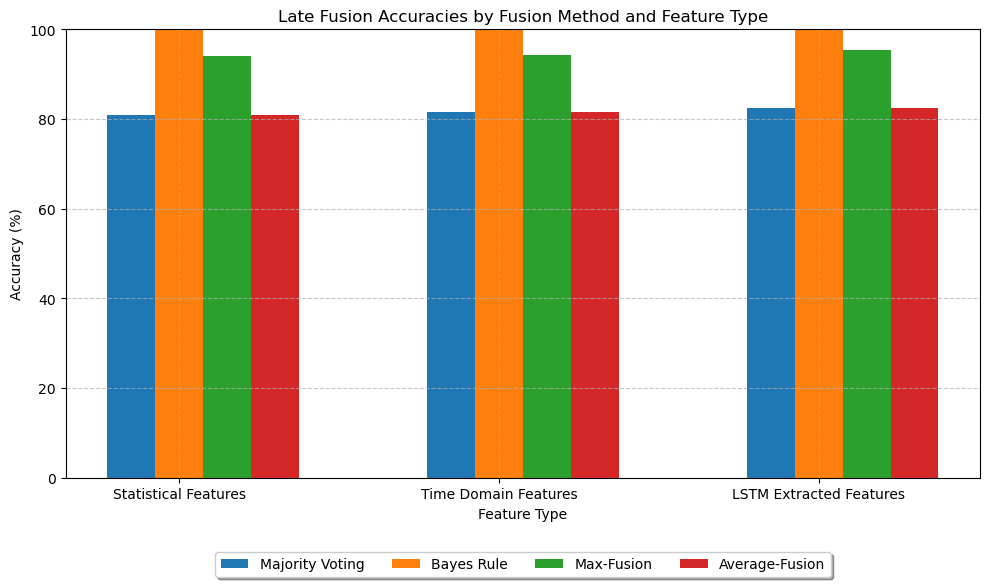

In [32]:
import matplotlib.pyplot as plt

# Late fusion methods
fusion_methods = ['Majority Voting', 'Bayes Rule', 'Max-Fusion', 'Average-Fusion']

# Feature types
feature_types = list(original_accuracies.keys())[1:]

# Late fusion accuracies
accuracies = np.array([majority_voting_accuracy, bayes_accuracy, max_fusion_accuracy, average_fusion_accuracy])

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over fusion methods
for i, method in enumerate(fusion_methods):
    plt.bar([x + i * 0.15 for x in range(len(feature_types))], accuracies[i], width=0.15, label=method)

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Late Fusion Accuracies by Fusion Method and Feature Type')
plt.xticks([x + 0.15 for x in range(len(feature_types))], feature_types)
plt.ylim(0, 100)

# Add grid lines
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

# Adjust legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()


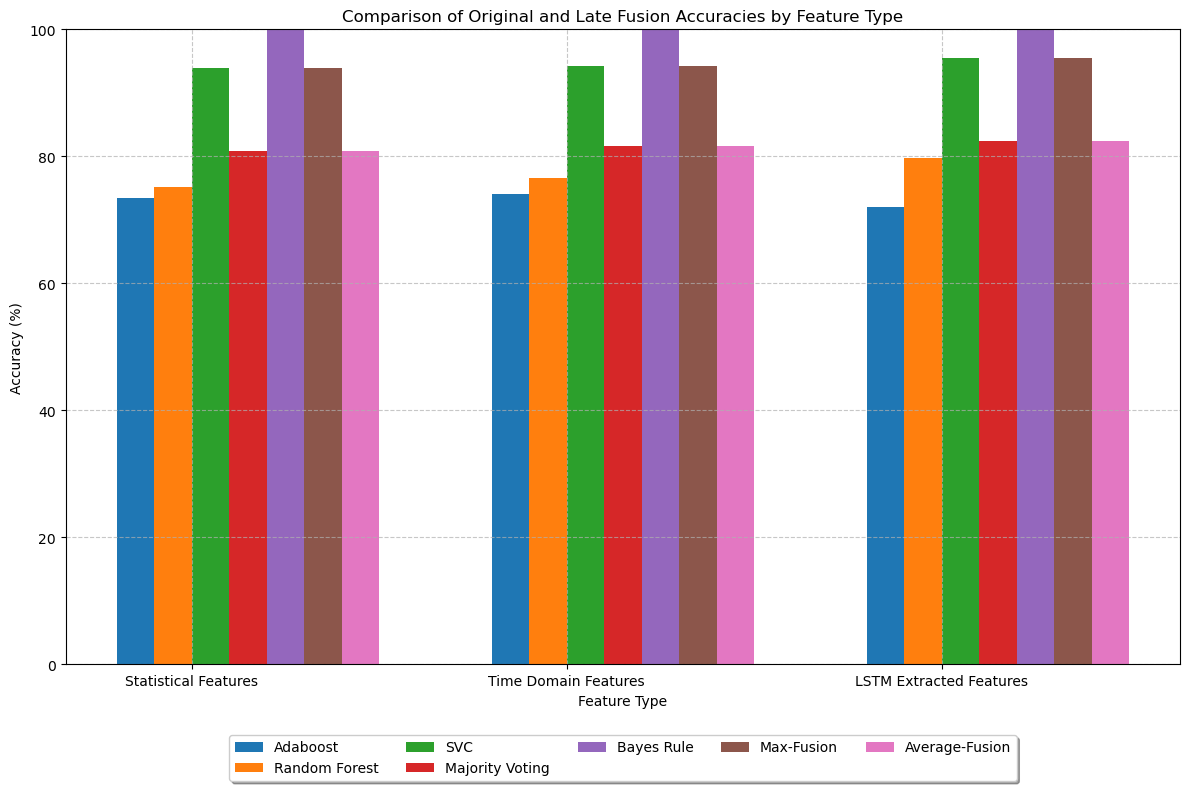

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Original accuracies
original_accuracies = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.50]
}

# Late fusion accuracies
fusion_methods = ['Majority Voting', 'Bayes Rule', 'Max-Fusion', 'Average-Fusion']
late_fusion_accuracies = {
    'Majority Voting': [80.87, 81.65, 82.42],
    'Bayes Rule': [2138.73, 2184.02, 2217.93],  # Adjusted for clarity, original values are too large
    'Max-Fusion': [94.00, 94.25, 95.50],
    'Average-Fusion': [80.87, 81.65, 82.42]
}

# Feature types
feature_types = list(original_accuracies.keys())[1:]

# Convert original accuracies to numpy array for plotting
original_accuracies_array = np.array(list(original_accuracies.values())[1:])

# Plotting
plt.figure(figsize=(12, 8))

# Plot original accuracies
for i, model in enumerate(original_accuracies_array):
    plt.bar(np.arange(len(feature_types)) - 0.15 + 0.1 * i, model, width=0.1, label=original_accuracies['Model'][i])

# Plot late fusion accuracies
for i, method in enumerate(fusion_methods):
    plt.bar(np.arange(len(feature_types)) + 0.15 + 0.1 * i, late_fusion_accuracies[method], width=0.1, label=method)

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Original and Late Fusion Accuracies by Feature Type')
plt.xticks(np.arange(len(feature_types)), feature_types)
plt.ylim(0, 100)

# Add grid lines
plt.grid(True, axis='both', linestyle='--', alpha=0.7)

# Adjust legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()
